In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

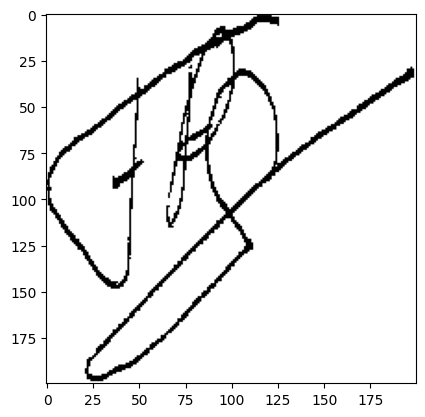

In [2]:
img = cv2.imread(r'C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\test\059_forg/01_0125059.PNG')
plt.imshow(img)

In [3]:
img.shape

(200, 200, 3)

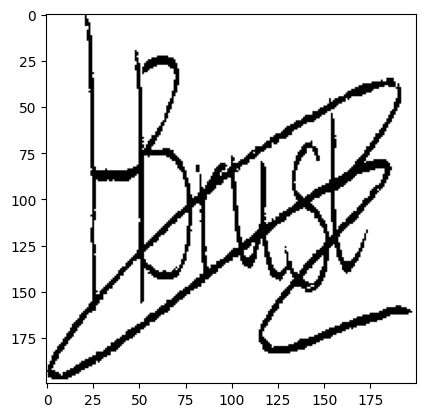

In [4]:
img1=cv2.imread(r'C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train\009_forg/0201009_03.png')
plt.imshow(img1)

In [5]:
img1.shape

(200, 200, 3)

In [6]:
base_directory = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train"

def process_image(image_path):
    img = cv2.imread(image_path)
    # Converting to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Applying Gaussian blur
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    #thresholding
    ret, img = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #resizing the image
    resized_img = cv2.resize(img, (200, 200))
    #resized_img = resized_img /255.0
    cv2.imwrite(image_path, resized_img)

In [7]:
for root, ret, files in os.walk(base_directory):
    for file in files:
        if file.endswith(( ".PNG", ".png")):
            img_path = os.path.join(root, file)
            process_image(img_path)

In [8]:
for root, ret, files in os.walk(r'C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\test'):
    for file in files:
        if file.endswith(( ".PNG", ".png")):
            img_path = os.path.join(root, file)
            process_image(img_path)

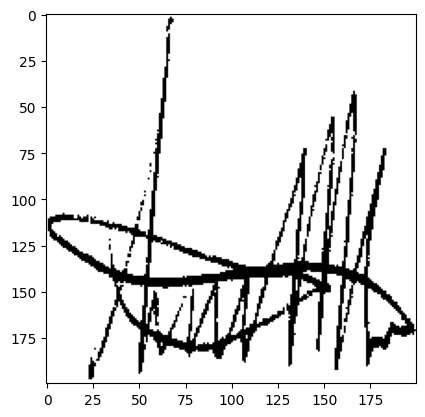

In [9]:
img2=cv2.imread(r'C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\test/054_forg/03_0207054.PNG')
plt.imshow(img2)

In [10]:
img2.shape

(200, 200, 3)

In [11]:
train_data = pd.read_csv(r'C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train_data.csv')
test_data = pd.read_csv(r'C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\test_data.csv')

In [12]:
train_data

,Column1,Column2,Result
0,068/09_068.png,068_forg/03_0113068.PNG,1
1,068/09_068.png,068_forg/01_0124068.PNG,1
2,068/09_068.png,068_forg/02_0124068.PNG,1
3,068/09_068.png,068_forg/01_0113068.PNG,1
4,068/09_068.png,068_forg/04_0124068.PNG,1
...,...,...,...
23201,031/02_031.png,031/03_031.png,0
23202,031/02_031.png,031/12_031.png,0
23203,031/02_031.png,031/11_031.png,0
23204,031/02_031.png,031/06_031.png,0


In [13]:
train_data.size

69618

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23206 entries, 0 to 23205
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  23206 non-null  object
 1   Column2  23206 non-null  object
 2   Result   23206 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 544.0+ KB


In [15]:
test_data.head()

,Column1,Column2,Result
0,068/09_068.png,068_forg/03_0113068.PNG,1
1,068/09_068.png,068_forg/01_0124068.PNG,1
2,068/09_068.png,068_forg/02_0124068.PNG,1
3,068/09_068.png,068_forg/01_0113068.PNG,1
4,068/09_068.png,068_forg/04_0124068.PNG,1


In [16]:
test_data.shape

(5748, 3)

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  5748 non-null   object
 1   Column2  5748 non-null   object
 2   Result   5748 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 134.8+ KB


In [18]:
x_train = train_data[['Column1','Column2']]
y_train = train_data['Result']

In [19]:
x_train

,Column1,Column2
0,068/09_068.png,068_forg/03_0113068.PNG
1,068/09_068.png,068_forg/01_0124068.PNG
2,068/09_068.png,068_forg/02_0124068.PNG
3,068/09_068.png,068_forg/01_0113068.PNG
4,068/09_068.png,068_forg/04_0124068.PNG
...,...,...
23201,031/02_031.png,031/03_031.png
23202,031/02_031.png,031/12_031.png
23203,031/02_031.png,031/11_031.png
23204,031/02_031.png,031/06_031.png


In [20]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
23201    0
23202    0
23203    0
23204    0
23205    0
Name: Result, Length: 23206, dtype: int64

In [21]:
y_train.nunique()

2

In [22]:
x_train.shape

(23206, 2)

In [23]:
# number_of_samples = x_train.shape[0]
# x_train = np.reshape(x_train, (, 200, 200, 1))

In [24]:
X_val= test_data[['Column1', 'Column2']]
Y_val= test_data[['Result']]

In [25]:
X_val

,Column1,Column2
0,068/09_068.png,068_forg/03_0113068.PNG
1,068/09_068.png,068_forg/01_0124068.PNG
2,068/09_068.png,068_forg/02_0124068.PNG
3,068/09_068.png,068_forg/01_0113068.PNG
4,068/09_068.png,068_forg/04_0124068.PNG
...,...,...
5743,066/01_066.png,066/06_066.png
5744,066/01_066.png,066/08_066.png
5745,066/01_066.png,066/02_066.png
5746,066/01_066.png,066/05_066.png


In [26]:
Y_val

,Result
0,1
1,1
2,1
3,1
4,1
...,...
5743,0
5744,0
5745,0
5746,0


In [27]:
X_val.shape

(5748, 2)

In [28]:
Y_val.shape

(5748, 1)

In [29]:
# X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.4,random_state=25)
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train,test_size=0.3,random_state=50)

In [30]:
X_train

,Column1,Column2
17618,013/01_013.png,013_forg/01_0203013.PNG
19936,041/05_041.png,041/11_041.png
5883,022/05_022.png,022/10_022.png
22466,061/03_061.png,061_forg/02_0102061.PNG
13373,030/12_030.png,030/09_030.png
...,...,...
15649,057/02_057.png,057/07_057.png
22637,061/12_061.png,061/11_061.png
10123,023/02_023.png,023/11_023.png
5600,044/10_044.png,044/12_044.png


In [31]:
Y_test = np.array(Y_test)

In [32]:
Y_test.shape

(6962,)

In [33]:
Y_train.shape

(16244,)

In [34]:
def path_to_array(image_path, target_size=(200, 200)):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, target_size)
            image = image / 255.0
            return image
        else:
            print(f"Error loading image: {image_path}")
            return None
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(str(e))
        return None

X_train_1 = []
X_train_2 = []

for index, row in X_train.iterrows():
    image_path_1 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train\\"+row['Column1']
    #print(image_path_1)
    image_array_1 = path_to_array(image_path_1)
    
    if image_array_1 is not None:
        X_train_1.append(image_array_1)
    
    image_path_2 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train\\"+row['Column2']
    image_array_2 = path_to_array(image_path_2)
    
    if image_array_2 is not None:
        X_train_2.append(image_array_2)

X_train_1 = np.array(X_train_1)
X_train_2 = np.array(X_train_2)

In [35]:
X_train_1

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [36]:
X_train_1.shape

(16244, 200, 200)

In [37]:
X_train_2

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [38]:
X_train_2.shape

(16244, 200, 200)

In [39]:
Y_train

17618    1
19936    0
5883     0
22466    1
13373    0
        ..
15649    0
22637    0
10123    0
5600     0
14000    0
Name: Result, Length: 16244, dtype: int64

In [40]:
Y_train.shape

(16244,)

In [41]:
X_test_1 = []
X_test_2 = []

for index, row in X_test.iterrows():
    image_path_1 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train\\"+row['Column1']
    image_array_1 = path_to_array(image_path_1)
    
    if image_array_1 is not None:
        X_test_1.append(image_array_1)
    
    image_path_2 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train\\"+row['Column2']
    image_array_2 = path_to_array(image_path_2)
    
    if image_array_2 is not None:
        X_test_2.append(image_array_2)

X_test_1 = np.array(X_test_1)
X_test_2 = np.array(X_test_2)

In [42]:
X_test_1

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [43]:
X_test_2

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 0., 0., ..., 1., 1., 1.],
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [44]:
X_test_1.shape

(6962, 200, 200)

In [45]:
X_test_2.shape

(6962, 200, 200)

In [46]:
X_val_1 = []
X_val_2 = []

for index, row in X_val.iterrows():
    image_path_1 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\test\\"+row['Column1']
    image_array_1 = path_to_array(image_path_1)
    
    if image_array_1 is not None:
        X_val_1.append(image_array_1)
    
    image_path_2 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\test\\"+row['Column2']
    image_array_2 = path_to_array(image_path_2)
    
    if image_array_2 is not None:
        X_val_2.append(image_array_2)

X_val_1 = np.array(X_val_1)
X_val_2 = np.array(X_val_2)

In [47]:
X_val_1.shape

(5748, 200, 200)

In [48]:
X_val_2.shape

(5748, 200, 200)

In [49]:
def siamese_model():
    input1 = Input((200,200,1)),
    input2 = Input((200,200,1)),

    model = Sequential()
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200,200,1)))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation='relu'))

    embedding1 = model(input1)
    embedding2 = model(input2)

    loss_layer = Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))
    manhattan_distance = loss_layer([embedding1, embedding2])
    output = Dense(1, activation='sigmoid')(manhattan_distance)
    siamese_network = Model(inputs=[input1, input2], outputs=output)
    return siamese_network

In [50]:
s_model = siamese_model()

In [51]:
s_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 1)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 200, 200, 1)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 128)                  1752192   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 128)                  0         ['sequential[0][0]',      

In [52]:
s_model.compile(optimizer = "adam", loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
s_model.fit([X_train_1,X_train_2],Y_train, batch_size=32, steps_per_epoch = 350, epochs=5, validation_data=([X_test_1, X_test_2], Y_test))

Epoch 1/5
350/350 [==============================] - 2354s 7s/step - loss: 0.6262 - accuracy: 0.6354 - val_loss: 0.5005 - val_accuracy: 0.7723
Epoch 2/5
350/350 [==============================] - 1941s 6s/step - loss: 0.4000 - accuracy: 0.8163 - val_loss: 0.2433 - val_accuracy: 0.9104
Epoch 3/5
350/350 [==============================] - 1044s 3s/step - loss: 0.2303 - accuracy: 0.9075 - val_loss: 0.1411 - val_accuracy: 0.9530
Epoch 4/5
350/350 [==============================] - 632s 2s/step - loss: 0.1330 - accuracy: 0.9495 - val_loss: 0.0941 - val_accuracy: 0.9695
Epoch 5/5
350/350 [==============================] - 633s 2s/step - loss: 0.0919 - accuracy: 0.9668 - val_loss: 0.0575 - val_accuracy: 0.9796


In [54]:
Y_predict = s_model.predict([X_val_1, X_val_2])

180/180 [==============================] - 83s 390ms/step


In [55]:
Y_predict = (Y_predict > 0.75).astype(int)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy = accuracy_score(Y_val, Y_predict)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.57%


In [58]:
import joblib

In [59]:
joblib.dump(s_model, r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\ModelFiles\Signature_Forgery_Detector.joblib")

['C:\\Users\\sunje\\PycharmProjects\\NewSignatureVerification\\.venv\\UpdatedSignatureVerifcation\\ModelFiles\\Signature_Forgery_Detector.joblib']

In [60]:
load_model = joblib.load(r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\ModelFiles\Signature_Forgery_Detector.joblib")

In [61]:
load_model

In [62]:
test_img_1 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset/train/006/006_14.PNG"
test_img_2 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train/006/006_16.PNG"
test_img_3 = r"C:\Users\sunje\PycharmProjects\NewSignatureVerification\.venv\UpdatedSignatureVerifcation\Dataset\train/006_forg/0202006_03.png"

In [63]:
process_image(test_img_1)
process_image(test_img_2)
process_image(test_img_3)

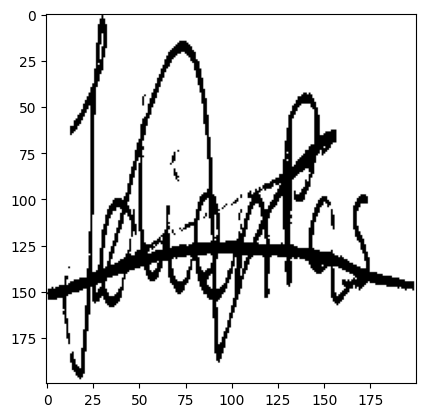

In [64]:
test_image_1 = cv2.imread(test_img_1)
plt.imshow(test_image_1)

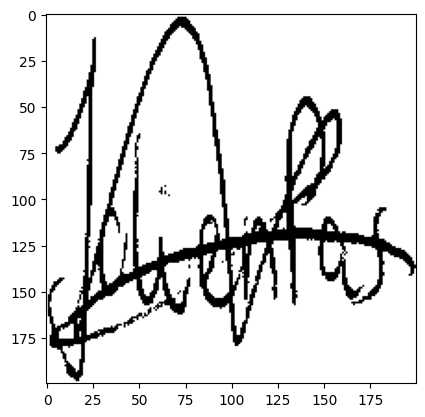

In [65]:
test_image_2 = cv2.imread(test_img_2)
plt.imshow(test_image_2)

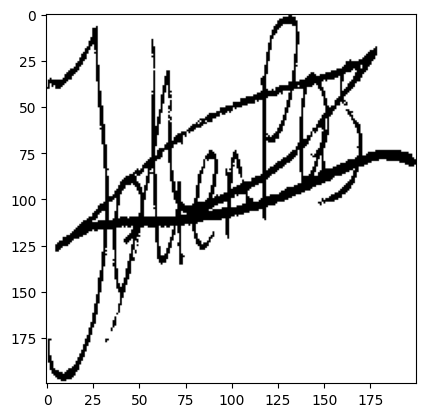

In [66]:
test_image_3 = cv2.imread(test_img_3)
plt.imshow(test_image_3)

In [67]:
def img_to_array(input_path):
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    img = img/255.0
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [68]:
test_img_1_val = img_to_array(test_img_1)

In [69]:
test_img_1_val

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])

In [70]:
test_img_2_val = img_to_array(test_img_2)

In [71]:
test_img_2_val

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])

In [72]:
test_img_3_val = img_to_array(test_img_3)

In [73]:
test_img_3_val

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])

In [74]:
prediction = load_model.predict([test_img_1_val, test_img_2_val])

1/1 [==============================] - 1s 791ms/step


In [75]:
prediction = (prediction > 0.75).astype(int)
print(prediction)
if(prediction[0] ==0):
    print("Signatre is genuine")
else:
    print("Signature is forged")

[[0]]
Signatre is genuine


In [76]:
prediction = load_model.predict([test_img_1_val, test_img_3_val])

1/1 [==============================] - 0s 95ms/step


In [77]:
prediction = (prediction > 0.75).astype(int)
print(prediction)
if(prediction[0] ==0):
    print("Signatre is genuine")
else:
    print("Signature is forged")

[[1]]
Signature is forged
